In [238]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [239]:
df=pd.read_excel("C:/Users/tejas/OneDrive/Desktop/ufo.xlsx")

In [240]:
df.head(10)

,Date & Time,City,State,Shape
0,1949-10-10 20:30:00,San Marcos,TX,Cylinder
1,1956-10-10 21:00:00,Edna,TX,Circle
2,1960-10-10 20:00:00,Kaneohe,HI,Light
3,1961-10-10 19:00:00,Bristol,TN,Sphere
4,1965-10-10 23:45:00,Norwalk,CT,Disk
5,1966-10-10 20:00:00,Pell City,AL,Disk
6,1966-10-10 21:00:00,Live Oak,FL,Disk
7,1968-10-10 13:00:00,Hawthorne,CA,Circle
8,1968-10-10 19:00:00,Brevard,NC,Fireball
9,1970-10-10 16:00:00,Bellmore,NY,Disk


In [241]:
df.describe()

,Date & Time,City,State,Shape
count,58354,58354,58354,58354
unique,51939,10749,50,21
top,2012-07-04 22:00:00,Seattle,CA,Light
freq,28,436,8039,13344


In [242]:
#function to split date and time
date=[]
time=[]
for x in df["Date & Time"]:
    y = (str(x).split())
    date.append(y[0])
    time.append(y[-1])

In [243]:
df["Date"]=date

In [244]:
df["time"] = time

In [245]:
df=df.drop("Date & Time",axis=1)

In [246]:
#dataframe with time extracted into separate column
df

,City,State,Shape,Date,time
0,San Marcos,TX,Cylinder,1949-10-10,20:30:00
1,Edna,TX,Circle,1956-10-10,21:00:00
2,Kaneohe,HI,Light,1960-10-10,20:00:00
3,Bristol,TN,Sphere,1961-10-10,19:00:00
4,Norwalk,CT,Disk,1965-10-10,23:45:00
...,...,...,...,...,...
58349,Nashville,TN,Light,2013-09-09,21:15:00
58350,Boise,ID,Circle,2013-09-09,22:00:00
58351,Napa,CA,Other,2013-09-09,22:00:00
58352,Vienna,VA,Circle,2013-09-09,22:20:00


In [247]:
#what is the most common time of UFO sighting?
t=df.time.value_counts().head(10)
t=pd.DataFrame(t)
t

,time
22:00:00,3379
21:00:00,3359
20:00:00,2407
23:00:00,2344
21:30:00,1776
19:00:00,1705
22:30:00,1561
20:30:00,1314
00:00:00,1170
18:00:00,1099


Text(0.5, 1.0, 'Time frequency of UFO sightings')

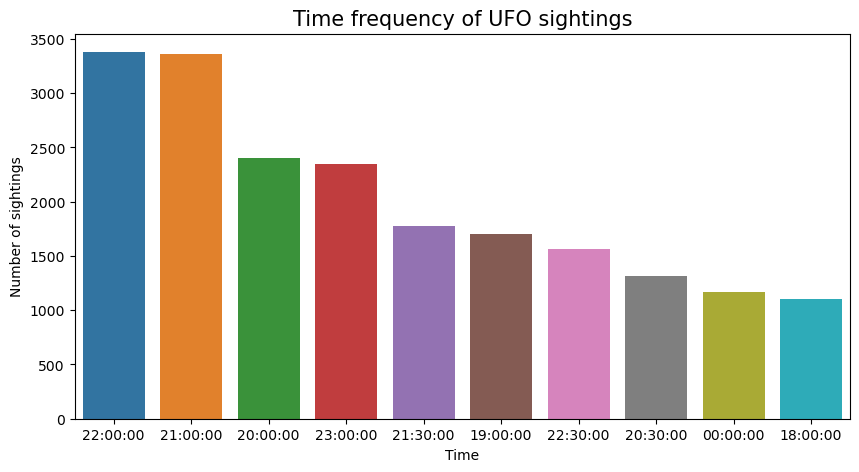

In [248]:
fig, ax = plt.subplots(figsize=(10, 5))
p = sns.barplot(x=t.index,y=t.time)
p.set_ylabel("Number of sightings", fontsize = 10)
p.set_xlabel("Time", fontsize = 10)
p.set_title("Time frequency of UFO sightings", fontsize= 15)

In [249]:
#what is the most common place for UFO sighting?
c= df[["City","State"]].agg(" ".join,axis=1)
c=pd.DataFrame(c.value_counts(),columns=["Counts"])
c["Place"]=c.index
c.reset_index(inplace=True)
c=c.drop("index",axis=1)
c=c[["Place","Counts"]].head(10)
c


,Place,Counts
0,Seattle WA,436
1,Phoenix AZ,404
2,Las Vegas NV,323
3,Los Angeles CA,317
4,San Diego CA,303
5,Portland OR,284
6,Houston TX,270
7,Chicago IL,234
8,Tucson AZ,211
9,Miami FL,206


Text(0.5, 1.0, 'Place frequency of UFO sightings')

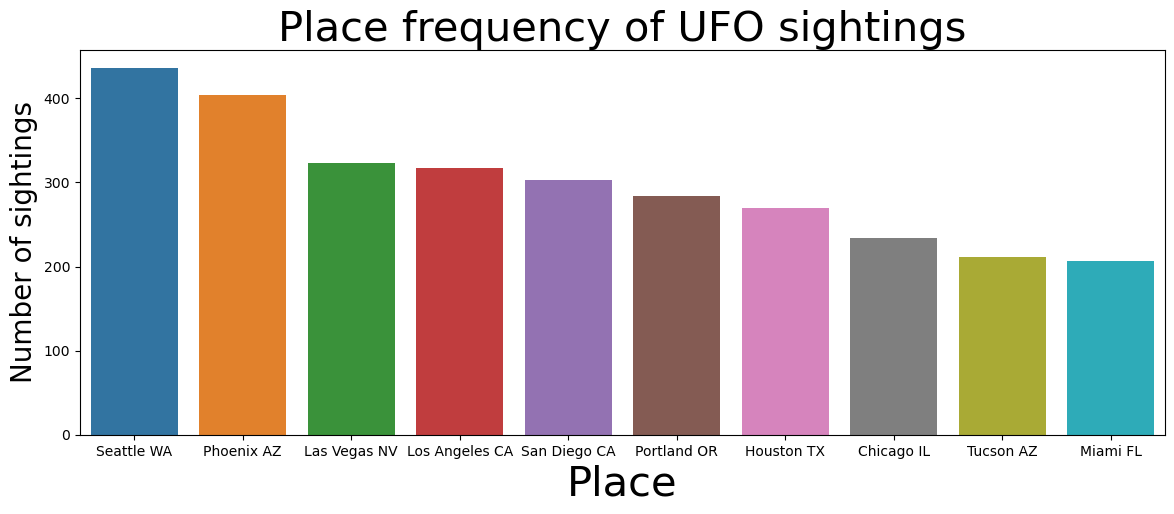

In [250]:
fig, ax = plt.subplots(figsize=(14, 5))
p = sns.barplot(x=c.Place,y=c.Counts)
p.set_ylabel("Number of sightings", fontsize = 20)
p.set_xlabel("Place", fontsize = 30)
p.set_title("Place frequency of UFO sightings", fontsize= 30)

In [251]:
df

,City,State,Shape,Date,time
0,San Marcos,TX,Cylinder,1949-10-10,20:30:00
1,Edna,TX,Circle,1956-10-10,21:00:00
2,Kaneohe,HI,Light,1960-10-10,20:00:00
3,Bristol,TN,Sphere,1961-10-10,19:00:00
4,Norwalk,CT,Disk,1965-10-10,23:45:00
...,...,...,...,...,...
58349,Nashville,TN,Light,2013-09-09,21:15:00
58350,Boise,ID,Circle,2013-09-09,22:00:00
58351,Napa,CA,Other,2013-09-09,22:00:00
58352,Vienna,VA,Circle,2013-09-09,22:20:00


In [252]:
df["Place"] = df["City"]+" "+df["State"]

In [253]:
df.drop(["City","State"],axis=1,inplace=True)
df


,Shape,Date,time,Place
0,Cylinder,1949-10-10,20:30:00,San Marcos TX
1,Circle,1956-10-10,21:00:00,Edna TX
2,Light,1960-10-10,20:00:00,Kaneohe HI
3,Sphere,1961-10-10,19:00:00,Bristol TN
4,Disk,1965-10-10,23:45:00,Norwalk CT
...,...,...,...,...
58349,Light,2013-09-09,21:15:00,Nashville TN
58350,Circle,2013-09-09,22:00:00,Boise ID
58351,Other,2013-09-09,22:00:00,Napa CA
58352,Circle,2013-09-09,22:20:00,Vienna VA


In [254]:
df["Datetime"]=df["Date"]+" "+df["time"]

In [255]:
#what is the most common time and shape of UFO sighting in Seattle?
s=df.loc[df["Place"]=="Seattle WA"]
s.drop(["Date","time"],axis=1,inplace=True)

C:\Users\tejas\AppData\Local\Temp\ipykernel_8080\11897058.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.drop(["Date","time"],axis=1,inplace=True)


In [256]:
s

,Shape,Place,Datetime
76,Sphere,Seattle WA,2002-10-10 06:00:00
97,Other,Seattle WA,2005-10-10 07:40:00
138,Light,Seattle WA,2008-10-10 20:00:00
288,Triangle,Seattle WA,2007-10-11 19:50:00
524,Teardrop,Seattle WA,2002-10-01 05:42:00
...,...,...,...
57791,Teardrop,Seattle WA,2004-09-06 20:10:00
57802,Triangle,Seattle WA,2005-09-06 22:00:00
57898,Triangle,Seattle WA,2002-09-07 01:30:00
57904,Circle,Seattle WA,2002-09-07 21:30:00


In [260]:
s.describe().loc["top"]

Shape                     Light
Place                Seattle WA
Datetime    2010-07-17 23:15:00
Name: top, dtype: object